# Лабораторна робота №2 ІАД

<b>Тема:</b>  Використання NumPy, Pandas та Matplotlib для обробки даних та візуалізації результатів<br>
<b>Мета:</b> Ознайомитися з основами роботи з бібліотеками NumPy, Pandas та Matplotlib для аналізу даних, проведення базових операцій з даними та візуалізації результатів.<br>
<b>Виконала:</b> студентка МІТ-31, Панченко Владислава


<b>Numpy</b>
- Імпортуйте бібліотеку NumPy.
- Створіть набір даних з використанням <i>arange</i> для лінійних значень та <i>random</i> для випадкових чисел.
- Виконайте CRUD операції (Create, Read, Update, Delete) над масивами даних.


In [78]:
import numpy as np

#create
array_arange = np.arange(10)
array_random = np.random.randint(1, 99, size=10)

#read
print(array_arange)
print(array_random)

#update
array_arange[9] = 10
array_random[9] += 100
print("Updated:", array_arange)
print("Updated:", array_random)

#delete
del array_random
del array_arange

[0 1 2 3 4 5 6 7 8 9]
[33 71 86 32 14 72 57 25 80 42]
Updated: [ 0  1  2  3  4  5  6  7  8 10]
Updated: [ 33  71  86  32  14  72  57  25  80 142]


<b>Pandas</b>
- Імпортуйте бібліотеку Pandas.
- Створіть DataFrame різними способами, зокрема з масиву NumPy та з використанням словників.
- Виконайте маніпуляції з даними: відображення перших рядків (head), опис статистики (describe), індексація (iloc, loc).

In [77]:
import pandas as pd
import numpy as np

data_numpy = np.array([[1, 'Holmes', 5],
                        [2, 'Watson', 24],
                        [3, 'Huddson', 28],
                        [4, 'Gregson', 30]])
dataframe_array = pd.DataFrame(data_numpy, columns=['ID', 'name', 'age'])

data_dict = {
    'ID': [1, 2, 3, 4],
    'Name': ['Holmes', 'Watson', 'Huddson', 'Gregson'],
    'Age': [24, 25, 28, 30]
}
dataframe_dict = pd.DataFrame(data_dict)

#відображення перших рядків
print(dataframe_array.head(1))
print(dataframe_dict.head(2))

#опис статистики
print(dataframe_array.describe())
print(dataframe_dict.describe())

  ID    name age
0  1  Holmes   5
   ID    Name  Age
0   1  Holmes   24
1   2  Watson   25
       ID    name age
count   4       4   4
unique  4       4   4
top     1  Holmes   5
freq    1       1   1
             ID        Age
count  4.000000   4.000000
mean   2.500000  26.750000
std    1.290994   2.753785
min    1.000000  24.000000
25%    1.750000  24.750000
50%    2.500000  26.500000
75%    3.250000  28.500000
max    4.000000  30.000000


In [76]:
import pandas as pd
import numpy as np

data_numpy = np.array([[1, 'Holmes', 5],
                        [2, 'Watson', 24],
                        [3, 'Huddson', 28],
                        [4, 'Gregson', 30]])
dataframe_array = pd.DataFrame(data_numpy, columns=['ID', 'name', 'age'])

data_dict = {
    'ID': [1, 2, 3, 4],
    'Name': ['Holmes', 'Watson', 'Huddson', 'Gregson'],
    'Age': [24, 25, 28, 30]
}
dataframe_dict = pd.DataFrame(data_dict)

#індексація
print("\nРядок 1:")
print(dataframe_dict.iloc[0])
print("\nРядок 2:")
print(dataframe_dict.loc[1])
print("\nРядок 3:")
print(dataframe_array.iloc[2])
print("\nРядок 4:")
print(dataframe_array.loc[3])


Рядок 1:
ID           1
Name    Holmes
Age         24
Name: 0, dtype: object

Рядок 2:
ID           2
Name    Watson
Age         25
Name: 1, dtype: object

Рядок 3:
ID            3
name    Huddson
age          28
Name: 2, dtype: object

Рядок 4:
ID            4
name    Gregson
age          30
Name: 3, dtype: object


<b>Matplotlib:</b>
- Імпортуйте бібліотеку Matplotlib.
- Згенеруйте дані для лінійної функції, враховуючи помилки вимірювань.
- Побудуйте графік функції та отриманих даних.
- Обчисліть метрики похибок MAE та MSE.
- Запишіть результати у CSV файл.


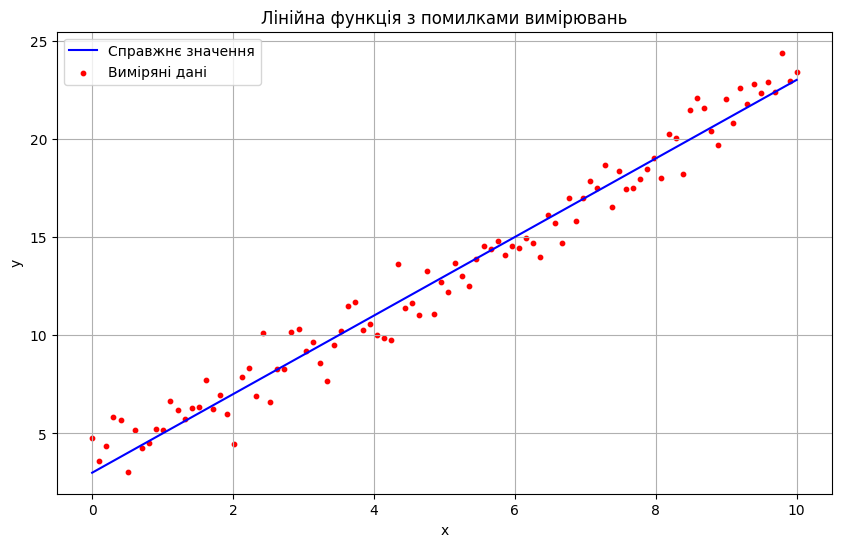

MAE:  {np.float64(0.8097058155741997)}
MSE:  {np.float64(1.0194036179371049)}


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def linear_function(x):
    return 2 * x + 3
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = linear_function(x)
noise = np.random.normal(0, 1, size=x.shape)
y_measured = y_true + noise

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Справжнє значення', color='blue')
plt.scatter(x, y_measured, color='red', s=10, label='Виміряні дані')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна функція з помилками вимірювань')
plt.legend()
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_true, y_measured)
mse = mean_squared_error(y_true, y_measured)
print("MAE: ", {mae})
print("MSE: ", {mse})

results = pd.DataFrame({
    'Metric': ['MAE', 'MSE'],
    'Value': [mae, mse]
})
results.to_csv('error_metrics.csv', index=False)